In [1]:
import pandas as pb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pb.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


now we have to do
1. null value treatment
2. outlier treatment
3. continous to categorial and categorial to continous

In [3]:
df.isna().sum()  ## Checks for a null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
## Outlier treatment can be done by ploting a box plot

import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

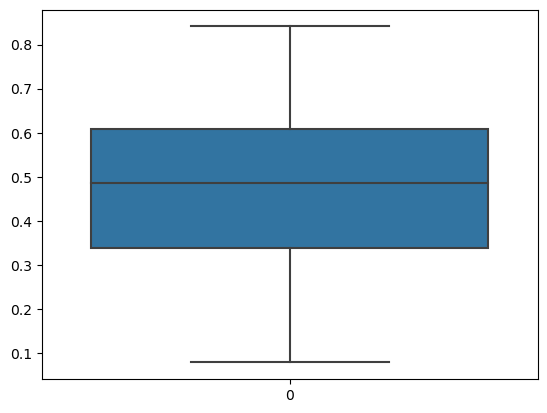

In [5]:
sns.boxplot(df.atemp)

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb06de490>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb06eb010>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb06e8d10>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb07006d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb0700c10>],
 'means': []}

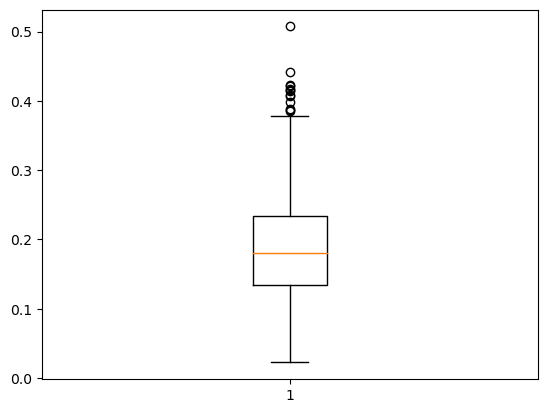

In [6]:
plt.boxplot(df.windspeed)

In [7]:
df[df.windspeed > 0.5]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [8]:
df1 = pb.read_csv("./hour.csv")

In [9]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


weathersit : 

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
## Data Preparation
## Continous(numerical) too categorial
weat = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
        2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
        3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
        4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

df.weathersit = df.weathersit.apply(lambda x: weat[x])
df1.weathersit = df1.weathersit.apply(lambda x: weat[x])


In [11]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [12]:
## Data Preparation
## Continous(numerical) to categorial
days = {0: "sunday", 1: "monday",2: "tuesday", 3: "wednesday",4: "thrusday", 5: "firday",6: "saturday"}
df.weekday = df.weekday.apply(lambda x : days[x])
df1.weekday = df1.weekday.apply(lambda x: days[x])

In [13]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [14]:
## Data Preparation
## Continous(numerical) to categorial
seas = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df.season = df.season.apply(lambda x: seas[x])
df1.season = df1.season.apply(lambda x: seas[x])

In [15]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
##df1.head()

In [17]:
## this makes a new df consisting of only numeric cols so there are no errors in df.corr()
## made this numeric df just to see and learn the hotmap of correlation
numeric_df = df.select_dtypes(include=[float, int])

<Axes: >

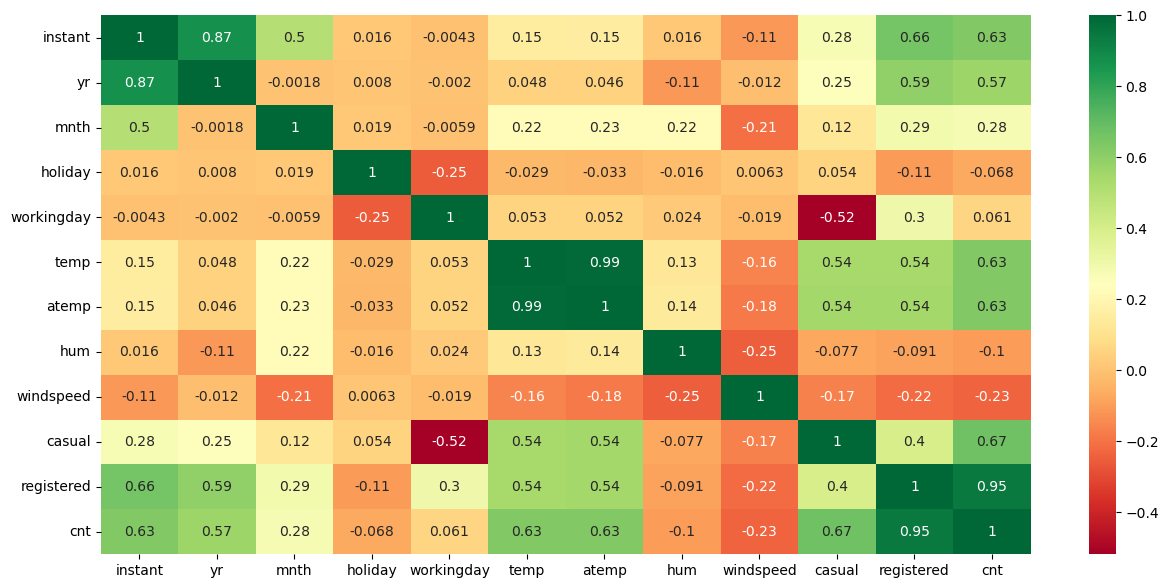

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot= True, cmap="RdYlGn")

In [19]:
##sns.pairplot(data=df)
## this is pairplot it is a plotting but it takes a lot of time so i commented it out

In [20]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


From here, encoding starts

In [21]:
## Dummy encoding using one hot also
df= pb.concat([df, pb.get_dummies(df.season, drop_first=True)], axis=1)
df.drop(columns="season", inplace=True)

In [22]:
## Dummy encoding using one hot also
df = pb.concat([df, pb.get_dummies(df.weekday, drop_first=True)], axis=1)
df.drop(columns="weekday", inplace=True)

In [23]:
## Dummy encoding using one hot also
df = pb.concat([df, pb.get_dummies(df.weathersit, drop_first=True)], axis=1)
df.drop(columns="weathersit", inplace=True)

In [24]:
## Data Preparation
## Continous(numerical) to categorial
mnt = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec", }
df.mnth = df.mnth.apply(lambda x: mnt[x])

In [25]:
## Dummy encoding using one hot also
df =  pb.concat([df, pb.get_dummies(df.mnth, drop_first=True)], axis=1)
df.drop(columns="mnth", inplace=True)

In [26]:
## changed all boolean to numeric so that i can use linear regression on that (simply converts False to 0 and True to 1)
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

In [27]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,0,0,1,0,0,0,0,0,0,0
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,0,0,1,0,0,0,0,0,0,0
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,0,0,1,0,0,0,0,0,0,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,0,0,1,0,0,0,0,0,0,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,0,0,1,0,0,0,0,0,0,0


From here, the model making starts

In [28]:
from sklearn.model_selection import train_test_split
import sklearn as sks
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import regression
from sklearn.preprocessing import MinMaxScaler

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [30]:
from sklearn.metrics import r2_score

In [31]:
##spliting the train test datas
df_train, df_test = train_test_split(df, test_size=0.2, random_state=45)

In [32]:
col = df_train.columns
col

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring', 'summer',
       'winter', 'monday', 'saturday', 'sunday', 'thrusday', 'tuesday',
       'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [33]:
y_train = df_train.pop("cnt")
col = df_train.columns

In [34]:
X_train = df_train
X_train_sm = sm.add_constant(X_train)

In [35]:
y_train = y_train.values

In [36]:
X_train_sm.drop(columns="dteday", inplace=True)
df_test.drop(columns="dteday", inplace=True)

Here we are doing the data prepration manually then we will do the same by automating the task using Scikit learn

Model Diagnostics / Model Validation

In [37]:
##OLS is a linear regression algorithm of statsmodel
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

## R Squared tells us about how good the independent variables predict the dependent variable
## Here the R Squared is 1 which means the model is overfed and it learned all the patterns that it was given which is not good as it does not makes any mistakes
## when this model will be ran on actual data its accuracy will be very low
## so we have to do Data Validation to decrease its value
## it can be done by correcting the p values and vif of columns
## high R squared value is good but 1 is not good

##Here the P values(P>[t]) are the ones causing the problems they are basically errors and are decreasing the accuracy of the model
## P values tells us how important the coefficient of a variable is
## lower P value means it imoportant (less than 0.5)
## higher P value  means it is not so important (more than 0.5)
## delete the columns with 1 or near to 1 P values.

##Multicolinearity
## Here the independent variables makes relation with each other and that is not good
## this happens when two independent variables provide very similar information so one of them is useless to include in the data
## so we remove columns with high p values 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.718e+30
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        13:58:44   Log-Likelihood:                 14240.
No. Observations:                 584   AIC:                        -2.842e+04
Df Residuals:                     552   BIC:                        -2.828e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                   -3.581e-12   3.69e-12     -0.970      0.332   -1.08e-11    3.67e-12
instant                                                                                 -7.105e-15   3.05e-14     -0.233      0.816    -6.7e-14    5.28e-14
yr                                                                                      -1.819e-12   1.13e-11     -0.161      0.872    -2.4e-11    2.03e-11
holiday                                                                                 -2.274e-12   1.61e-12     -1.411      0.159   -5.44e-12    8.92e-13
workingday                                                                              -9.095e-13   1.26e-12     -0.724      0.469   -3.38e-12    1.56e-12
temp                                                                                    -3.638e-12   1.22e-11     -0.297      0.766   -2.77e-11    2.04e-11
atemp                                                                                        1e-11   1.27e-11      0.790      0.430   -1.49e-11    3.49e-11
hum                                                                                      -1.99e-12   2.78e-12     -0.715      0.475   -7.45e-12    3.47e-12
windspeed                                                                               -4.547e-13   3.89e-12     -0.117      0.907   -8.09e-12    7.18e-12
casual                                                                                      1.0000   8.14e-16   1.23e+15      0.000       1.000       1.000
registered                                                                                  1.0000   4.67e-16   2.14e+15      0.000       1.000       1.000
spring                                                                                   1.364e-12   2.01e-12      0.680      0.497   -2.58e-12     5.3e-12
summer                                                                                   1.194e-12   1.71e-12      0.697      0.486   -2.17e-12    4.56e-12
winter                                                                                    2.16e-12    1.8e-12      1.197      0.232   -1.38e-12     5.7e-12
monday                                                                                   6.253e-13   1.04e-12      0.602      0.547   -1.41e-12    2.66e-12
saturday                                                                                -5.684e-14   1.21e-12     -0.047      0.962   -2.43e-12    2.32e-12
sunday                                                                                  -1.108e-12   1.19e-12     -0.93

In [38]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [39]:
vif
## all that have high variance factor are bad so we remove highest ones and other gets adjusted by itself

,features,VIF
0,const,0.000000
1,instant,596.456056
2,yr,452.761754
3,holiday,inf
4,workingday,inf
5,temp,73.038716
6,atemp,61.790756
7,hum,2.192500
8,windspeed,1.321145
9,casual,4.026853


In [40]:
vif[vif["VIF"] > 5]
## first remove the cols with maximum p values and then columns with maximum vif and other columns vif will automatically decrease

,features,VIF
1,instant,596.456056
2,yr,452.761754
3,holiday,inf
4,workingday,inf
5,temp,73.038716
6,atemp,61.790756
10,registered,7.732656
11,spring,10.693840
12,summer,7.639907
13,winter,8.730801


In [41]:
col = list(col)

In [42]:
## dec and saturday have very high P values and VIF so we remove those columns to increase the accuracy of the model
col.remove("Dec")
col.remove("saturday")

In [43]:
## it was a  string and it was useless column so removed it
col.remove("dteday")

In [44]:
## again running the linear regression (OLS)
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.775e+31
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        13:58:44   Log-Likelihood:                 15256.
No. Observations:                 584   AIC:                        -3.045e+04
Df Residuals:                     553   BIC:                        -3.031e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                   -1.705e-12   6.77e-13     -2.517      0.012   -3.04e-12   -3.75e-13
instant                                                                                  1.166e-15   1.56e-15      0.746      0.456    -1.9e-15    4.24e-15
yr                                                                                      -1.023e-12   6.15e-13     -1.664      0.097   -2.23e-12    1.84e-13
holiday                                                                                  7.958e-13   3.33e-13      2.389      0.017    1.41e-13    1.45e-12
workingday                                                                              -7.958e-13   2.19e-13     -3.629      0.000   -1.23e-12   -3.65e-13
temp                                                                                    -9.095e-12   2.14e-12     -4.252      0.000   -1.33e-11   -4.89e-12
atemp                                                                                        1e-11   2.22e-12      4.511      0.000    5.65e-12    1.44e-11
hum                                                                                     -2.274e-13   4.88e-13     -0.466      0.641   -1.19e-12     7.3e-13
windspeed                                                                                1.819e-12   6.81e-13      2.669      0.008     4.8e-13    3.16e-12
casual                                                                                      1.0000   1.43e-16   7.01e+15      0.000       1.000       1.000
registered                                                                                  1.0000   8.17e-17   1.22e+16      0.000       1.000       1.000
spring                                                                                   1.364e-12   3.51e-13      3.885      0.000    6.74e-13    2.05e-12
summer                                                                                   6.821e-13   2.98e-13      2.288      0.023    9.65e-14    1.27e-12
winter                                                                                   -1.08e-12   3.13e-13     -3.450      0.001    -1.7e-12   -4.65e-13
monday                                                                                  -5.684e-14   1.82e-13     -0.312      0.755   -4.14e-13    3.01e-13
sunday                                                                                   7.958e-13   1.77e-13      4.491      0.000    4.48e-13    1.14e-12
thrusday                                                                                -2.842e-14   1.81e-13     -0.15

In [45]:
##Again checking the VIF
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [46]:
vif
## vif of every other coln dropped significantly
##
## a cat is not a dog 
## a tiger is not a dog        irrelevent
## a tiger is a cat

## if i remove the first line then the second line becomes more relevent.
## its same as that


## ORDER OF REMOVAL OF ROWS
## 1st always higher P(E) probablity of error
## 2nd higher vif

,features,VIF
0,const,212.578021
1,instant,50.927492
2,yr,43.752992
3,holiday,1.535831
4,workingday,4.835438
5,temp,72.517935
6,atemp,61.627788
7,hum,2.190797
8,windspeed,1.319540
9,casual,4.026848


Here the data preparation and Model Diagnostics ends now we will do the same by automating the task by Scikit learn

In [47]:
## From here its the same data preparation as before but now its automated using scikit learn
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.feature_selection import RFE

In [49]:
X_train = X_train[col]

In [50]:
X_train.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'spring', 'summer', 'winter',
       'monday', 'sunday', 'thrusday', 'tuesday', 'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [51]:
## using RFE(Recursive Function Eliminator) to tell me which columns should i include
lr_model = LinearRegression()
rfe = RFE(estimator = lr_model, n_features_to_select=15)
rfe =  rfe.fit(X_train, y_train)

In [52]:
## all the columns with True are to be included
rfe.support_

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,  True])

In [53]:
all_co_stats = list(X_train.columns)

## only including all the columns that rfet told us to include
co_to_choose = [all_co_stats[item] for item in range(len(all_co_stats)) if list(rfe.support_)[item] == True]

In [54]:
co_to_choose

['yr',
 'holiday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'spring',
 'tuesday',
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
 'Jun',
 'Nov',
 'Oct',
 'Sep']

In [55]:
##this is the only code to run model other all abovecode was to prepare the cols to put in X_train
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

## still the R Squared is 1 and P value of atemp is 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.800e+30
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        13:58:45   Log-Likelihood:                 14251.
No. Observations:                 584   AIC:                        -2.847e+04
Df Residuals:                     568   BIC:                        -2.840e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                          2.16e-12   2.38e-12      0.908      0.364   -2.51e-12    6.83e-12
yr                                                           -1.648e-12   8.28e-13     -1.990      0.047   -3.28e-12   -2.18e-14
holiday                                                      -3.297e-12   1.53e-12     -2.155      0.032    -6.3e-12   -2.92e-13
temp                                                         -8.185e-12   1.05e-11     -0.781      0.435   -2.88e-11    1.24e-11
atemp                                                                 0   1.17e-11          0      1.000    -2.3e-11     2.3e-11
hum                                                          -1.478e-12   2.41e-12     -0.614      0.539    -6.2e-12    3.25e-12
windspeed                                                     1.592e-12   3.59e-12      0.443      0.658   -5.47e-12    8.65e-12
casual                                                           1.0000   5.34e-16   1.87e+15      0.000       1.000       1.000
registered                                                       1.0000   3.36e-16   2.98e+15      0.000       1.000       1.000
spring                                                       -7.958e-13   9.59e-13     -0.830      0.407   -2.68e-12    1.09e-12
tuesday                                                      -5.969e-13   7.42e-13     -0.804      0.422   -2.05e-12    8.61e-13
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  1.762e-12   6.56e-13      2.686      0.007    4.74e-13    3.05e-12
Jun                                                          -3.297e-12   1.02e-12     -3.236      0.001    -5.3e-12    -1.3e-12
Nov                                                          -9.095e-13   1.08e-12     -0.842      0.400   -3.03e-12    1.21e-12
Oct                                                          -6.253e-13   1.01e-12     -0.621      0.535    -2.6e-12    1.35e-12
Sep                                                          -5.684e-14   1.01e-12     -0.056      0.955   -2.04e-12    1.92e-12
==============================================================================
Omnibus:                       17.873   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.699
Skew:                           0.336   Prob(JB):                     0.000390
Kurtosis:                       2.561   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might in

In [56]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,86.204674
1,yr,2.612480
2,holiday,1.065187
3,temp,57.229936
4,atemp,56.678263
5,hum,1.755737
6,windspeed,1.207399
7,casual,1.854300
8,registered,4.283444
9,spring,2.615363


WE CAN FURTHER CHOOSE TO REMOVE MORE COLUMNS FROM THIS TOO

In [57]:
co_to_choose.remove("temp")

In [58]:
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.825e+31
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        13:58:46   Log-Likelihood:                 14973.
No. Observations:                 584   AIC:                        -2.992e+04
Df Residuals:                     569   BIC:                        -2.985e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                        -1.023e-12   6.82e-13     -1.500      0.134   -2.36e-12    3.16e-13
yr                                                           -1.364e-12   2.41e-13     -5.672      0.000   -1.84e-12   -8.92e-13
holiday                                                      -6.821e-13   4.44e-13     -1.537      0.125   -1.55e-12     1.9e-13
atemp                                                         1.364e-12   7.99e-13      1.708      0.088   -2.04e-13    2.93e-12
hum                                                          -6.821e-13   6.99e-13     -0.976      0.330   -2.05e-12    6.91e-13
windspeed                                                    -1.592e-12   1.03e-12     -1.549      0.122   -3.61e-12    4.27e-13
casual                                                           1.0000   1.55e-16   6.46e+15      0.000       1.000       1.000
registered                                                       1.0000   9.74e-17   1.03e+16      0.000       1.000       1.000
spring                                                        1.137e-13   2.78e-13      0.409      0.683   -4.32e-13     6.6e-13
tuesday                                                       4.547e-13   2.16e-13      2.109      0.035    3.13e-14    8.78e-13
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  6.253e-13    1.9e-13      3.282      0.001    2.51e-13    9.99e-13
Jun                                                           2.274e-13   2.95e-13      0.770      0.442   -3.53e-13    8.07e-13
Nov                                                          -9.095e-13   3.12e-13     -2.916      0.004   -1.52e-12   -2.97e-13
Oct                                                           2.842e-14   2.91e-13      0.098      0.922   -5.42e-13    5.99e-13
Sep                                                                   0   2.92e-13          0      1.000   -5.74e-13    5.74e-13
==============================================================================
Omnibus:                        7.012   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                5.910
Skew:                           0.168   Prob(JB):                       0.0521
Kurtosis:                       2.639   Cond. No.                     6.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,84.011862
1,yr,2.611657
2,holiday,1.062693
3,atemp,3.116429
4,hum,1.755736
5,windspeed,1.169952
6,casual,1.849988
7,registered,4.274839
8,spring,2.605673
9,tuesday,1.074456


In [60]:
## still the VIF of registered is high and coeff of casual and registered is 1 so removing both columns
co_to_choose.remove("casual")
co_to_choose.remove("registered")
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.63e-198
Time:                        13:58:46   Log-Likelihood:                -4759.2
No. Observations:                 584   AIC:                             9544.
Df Residuals:                     571   BIC:                             9601.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         3405.1641    286.673     11.878      0.000    2842.103    3968.226
yr                                                            2066.5630     70.925     29.137      0.000    1927.257    2205.869
holiday                                                       -741.8730    203.992     -3.637      0.000   -1142.538    -341.208
atemp                                                         4673.8141    318.358     14.681      0.000    4048.519    5299.109
hum                                                          -2208.8272    315.925     -6.992      0.000   -2829.344   -1588.310
windspeed                                                    -2575.7225    471.649     -5.461      0.000   -3502.101   -1649.344
spring                                                       -1273.8193    119.584    -10.652      0.000   -1508.697   -1038.941
tuesday                                                        -15.9010     98.303     -0.162      0.872    -208.980     177.178
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  -259.5828     89.024     -2.916      0.004    -434.438     -84.728
Jun                                                            128.5614    138.873      0.926      0.355    -144.203     401.326
Nov                                                            108.1774    146.293      0.739      0.460    -179.160     395.515
Oct                                                            742.2148    133.049      5.579      0.000     480.891    1003.539
Sep                                                            784.4187    133.580      5.872      0.000     522.051    1046.786
==============================================================================
Omnibus:                       97.031   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.441
Skew:                          -0.894   Prob(JB):                     1.00e-47
Kurtosis:                       5.387   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,66.914624
1,yr,1.023789
2,holiday,1.012130
3,atemp,2.232514
4,hum,1.617217
5,windspeed,1.111229
6,spring,2.173204
7,tuesday,1.006976
8,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.446079
9,Jun,1.184586


Now the R Squared is high but not 1,
P values of all columns are low
VIF of all columns are moslty less than 3

In [62]:
y_test =df_test.pop("cnt")
X_test = df_test[co_to_choose]
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [63]:
y_test_pred

499    5490.386680
690    5663.741146
549    7327.803764
657    6320.586732
384    3454.841627
          ...     
240    4610.003951
329    3631.248990
424    3328.026737
143    3786.680206
6      1311.712039
Length: 147, dtype: float64

In [64]:
##residual error
res = y_test - y_test_pred

In [65]:
res

499   -2647.386680
690    -517.741146
549    -667.803764
657    -896.586732
384    -291.841627
          ...     
240      23.996049
329    -563.248990
424   -1494.026737
143     705.319794
6       198.287961
Length: 147, dtype: float64

<Axes: >

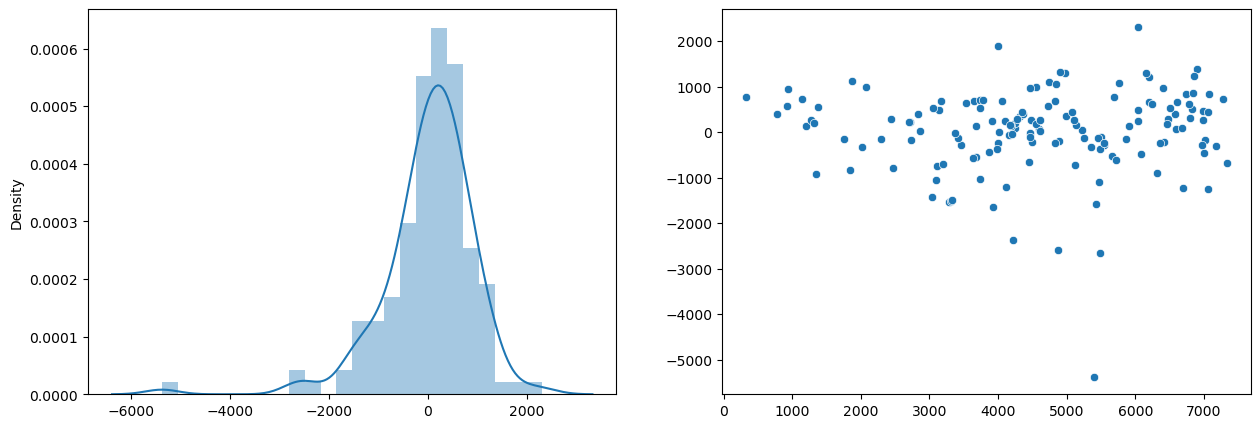

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(res)
##maximum of my errors are near/ in between 0 so that means my model is actually learning
plt.subplot(1,2,2)
sns.scatterplot(x = y_test_pred, y = res)
##maximum of my errors are lying in between 1000 and -1000

In [67]:
## accuracy of the model
r2_score(y_pred=y_test_pred, y_true=y_test)

0.7783199443921536